In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install pyforest 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyforest

In [5]:
# load the dataset
tweets=pd.read_csv('C:/Users/jalal muhammad/Desktop/python/assighnment/11 text mining/Elon_musk.csv',encoding='Latin-1')

In [6]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)

In [8]:
tweets.rename({'Text':'Tweets'},axis=1,inplace=True)
tweets

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
#Data Exploration
tweets['word_count'] = tweets['Tweets'].apply(lambda x: len(str(x).split(" ")))
tweets[['Tweets','word_count']].head()

,Tweets,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [10]:
##Number of characters
tweets['char_count'] = tweets['Tweets'].str.len() ## this also includes spaces
tweets[['Tweets','char_count']].head()

,Tweets,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [11]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

tweets['avg_word'] = tweets['Tweets'].apply(lambda x: avg_word(x))
tweets[['Tweets','avg_word']].head()

,Tweets,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


In [12]:
data = tweets.copy()

In [13]:
import re #regular expression
import string

def cleaning_text(text):

      text = re.sub('U+0001F923', "", text)
      text = re.sub('U+0001F3B6', "", text)
      text = re.sub('U+0001F5A4', "", text)
      text = re.sub('@[\w]*', " ", text)
      text = re.sub('https?://\S+|www\.\S+', " ", text)
      text = re.sub('\n',  " ", text)
      text = re.sub("ß", "b", text)
      text = re.sub("ð", "o", text)
      text = re.sub("ö", "o", text)
      text = re.sub("ø", "o", text)
      text = re.sub("ü", "u", text)
      text = re.sub("à", "a", text)
      text = re.sub("ä", "a", text)
      text = re.sub("è", "e", text)
      text = re.sub("é", "e", text)
      text = re.sub('', "", text)
      text = re.sub('', "", text)
      text = re.sub('\[.*?\]', '', text)
      text = re.sub('https?://\S+|www\.\S+', '', text)
      text = re.sub('<.*?>+', '', text)
      text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
      text = re.sub('\w*\d\w*', '', text)
      text = re.sub('@[\w]*', '', text)
      text = re.sub("[0-9" "]+"," ",text)
      text = re.sub('[‘’“”…]', '', text)
 
      return text

cleaning = lambda x: cleaning_text(x)

def clean_text(text):

      text = text.lower()
      text = re.sub(r'[^\w\s]'," ", text)
      
      return text

clean = lambda x: clean_text(x)

In [14]:
data['Tidy_Tweets'] = data.Tweets.apply(cleaning)
data.head(20)

,Tweets,word_count,char_count,avg_word,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,4.750000,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5.384615,Ray tracing on Cyberpunk with HDR is nextlev...
2,@joerogan @Spotify Great interview!,4,35,8.000000,Great interview
3,@gtera27 Doge is underestimated,4,31,7.000000,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,5.176471,Congratulations Tesla China for amazing exec...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,6.142857,Happy New Year of the Ox
6,"Frodo was the underdoge,\nAll thought he would...",12,96,5.928571,Frodo was the underdoge All thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,6.833333,Haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,7.181818,Indeed Tweets definitely do not represent ...
9,The most entertaining outcome is the most likely,8,48,5.125000,The most entertaining outcome is the most likely


In [15]:
data['Tidy_Tweets'] = data.Tidy_Tweets.apply(clean)
data.head(5)

,Tweets,word_count,char_count,avg_word,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,4.750000,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5.384615,ray tracing on cyberpunk with hdr is nextlev...
2,@joerogan @Spotify Great interview!,4,35,8.000000,great interview
3,@gtera27 Doge is underestimated,4,31,7.000000,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,5.176471,congratulations tesla china for amazing exec...


In [16]:
clean_total = " ".join(data["Tidy_Tweets"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 abcdefghijklmnopqrstuvwxyz ð
29


In [17]:
data = data[data['Tidy_Tweets']!='']
data.head(10)

,Tweets,word_count,char_count,avg_word,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,4.750000,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5.384615,ray tracing on cyberpunk with hdr is nextlev...
2,@joerogan @Spotify Great interview!,4,35,8.000000,great interview
3,@gtera27 Doge is underestimated,4,31,7.000000,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,5.176471,congratulations tesla china for amazing exec...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7,49,6.142857,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",12,96,5.928571,frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6,46,6.833333,haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11,89,7.181818,indeed tweets definitely do not represent ...
9,The most entertaining outcome is the most likely,8,48,5.125000,the most entertaining outcome is the most likely


In [18]:
from textblob import TextBlob
data['Tidy_Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                         i m an alien
1      ray tracing on cyberpunk with her is nextlev...
2                                      great interview
3                               done is underestimated
4      congratulations tell china for amazing execu...
Name: Tidy_Tweets, dtype: object

In [19]:
data.shape

(1995, 5)

In [20]:
data.drop_duplicates(subset=['Tidy_Tweets'], keep=False)
data.shape

(1995, 5)

In [21]:
#Word frequency
freq = pd.Series(' '.join(data['Tidy_Tweets']).split()).value_counts()[:20] # for top 20
freq

the     487
to      400
a       357
is      356
of      315
in      219
amp     218
it      194
for     194
we      172
will    165
s       163
be      157
that    148
this    140
i       137
on      129
rt      127
but     126
with    108
dtype: int64

In [22]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\MASHOODH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\MASHOODH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\MASHOODH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\MASHOODH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\MASHOODH\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to

True

In [23]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Tidy_Tweets'] = data['Tidy_Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data

,Tweets,word_count,char_count,avg_word,Tidy_Tweets
0,@kunalb11 Im an alien,4,22,4.750000,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5.384615,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,4,35,8.000000,great interview
3,@gtera27 Doge is underestimated,4,31,7.000000,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,17,104,5.176471,congratulations tesla china amazing execution ...
...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",23,144,5.260870,true sounds surreal negative propaganda still ...
1995,@PPathole Make sure to read ur terms &amp; con...,12,77,5.500000,make sure read ur terms amp conditions clickin...
1996,@TeslaGong @PPathole Samwise Gamgee,4,35,8.000000,samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,7,59,7.571429,altho dumb dumber


In [24]:
TextBlob(data['Tidy_Tweets'][3]).ngrams(1)

[WordList(['doge']), WordList(['underestimated'])]

In [25]:
TextBlob(data['Tidy_Tweets'][4]).ngrams(5)

[WordList(['congratulations', 'tesla', 'china', 'amazing', 'execution']),
 WordList(['tesla', 'china', 'amazing', 'execution', 'last']),
 WordList(['china', 'amazing', 'execution', 'last', 'year']),
 WordList(['amazing', 'execution', 'last', 'year', 'next']),
 WordList(['execution', 'last', 'year', 'next', 'even'])]

In [26]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Tidy_Tweets']).split()).value_counts()[:20] # for top 20
freq_Sw

amp         218
rt          127
tesla        96
yes          86
great        76
haha         55
good         51
launch       49
sure         43
would        41
yeah         41
much         40
dragon       39
first        39
one          39
like         38
spacex       35
true         35
probably     35
make         33
dtype: int64

In [27]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [28]:
top2_words = get_top_n2_words(data["Tidy_Tweets"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

<IPython.core.display.Javascript object>

,Bi-gram,Freq
0,rt falcon,17
1,crew dragon,13
2,pretty much,12
3,giga berlin,11
4,first stage,10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0, 0, 'rt falcon'),
 Text(1, 0, 'crew dragon'),
 Text(2, 0, 'pretty much'),
 Text(3, 0, 'giga berlin'),
 Text(4, 0, 'first stage'),
 Text(5, 0, 'falcon first'),
 Text(6, 0, 'next week'),
 Text(7, 0, 'coming soon'),
 Text(8, 0, 'static fire'),
 Text(9, 0, 'next year'),
 Text(10, 0, 'falcon launch'),
 Text(11, 0, 'great game'),
 Text(12, 0, 'next month'),
 Text(13, 0, 'course still'),
 Text(14, 0, 'still love'),
 Text(15, 0, 'one day'),
 Text(16, 0, 'first operational'),
 Text(17, 0, 'stage landed'),
 Text(18, 0, 'rt liftoff'),
 Text(19, 0, 'good point')]

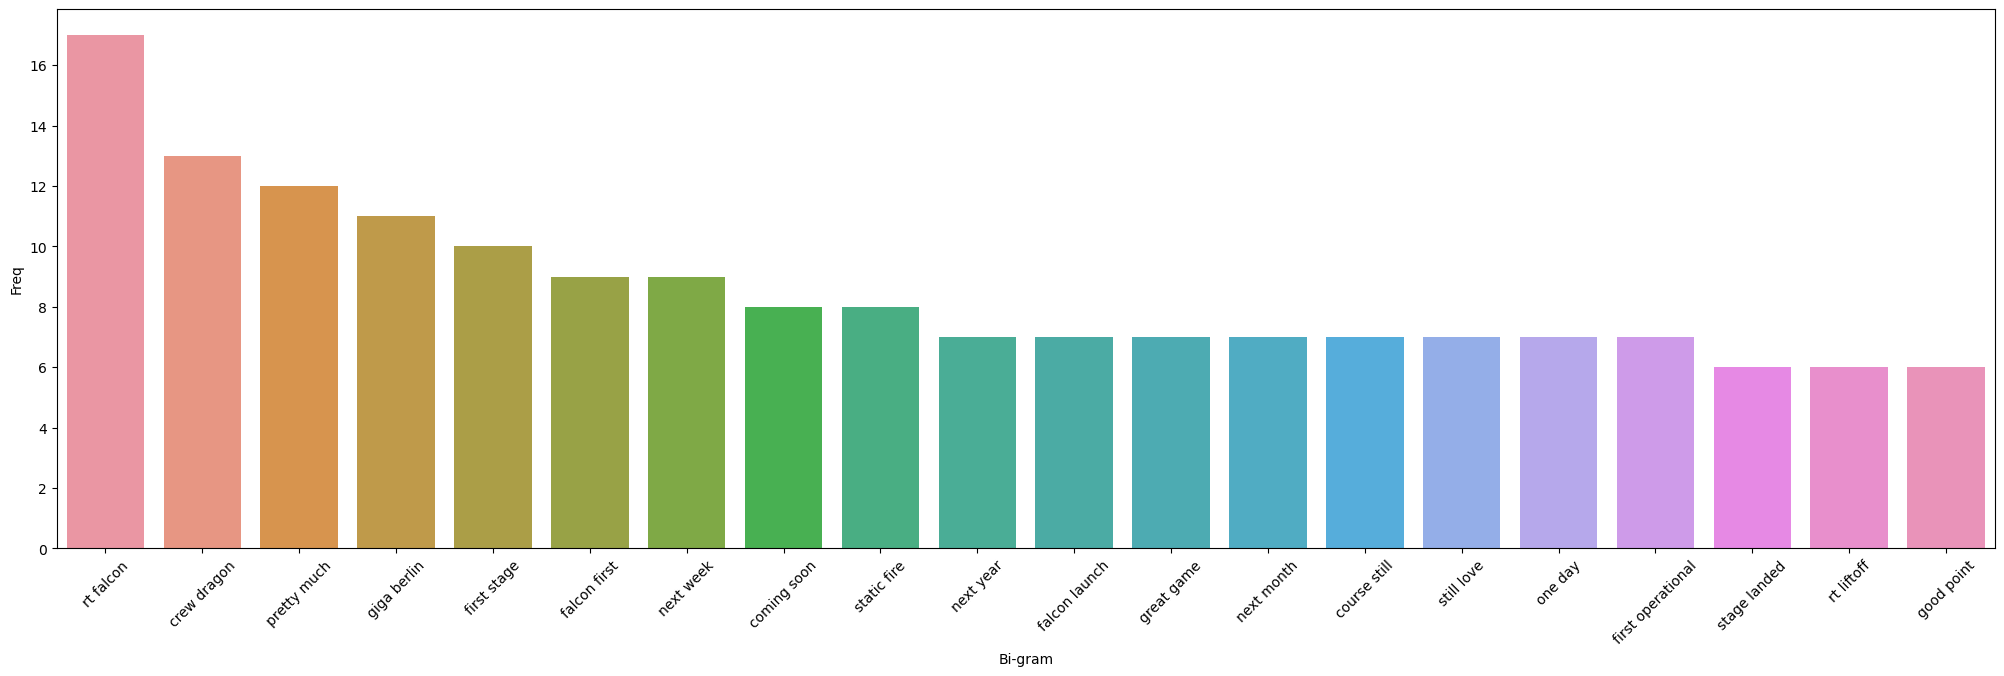

In [29]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [30]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [31]:
top3_words = get_top_n3_words(data["Tidy_Tweets"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

<IPython.core.display.Javascript object>

,Tri-gram,Freq
0,falcon first stage,9
1,rt falcon first,8
2,course still love,7
3,first stage landed,6
4,still love droneship,5
...,...,...
195,passed initial pressure,1
196,marvin martian helm,1
197,martian helm dog,1
198,public hamstring starlink,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0, 0, 'falcon first stage'),
 Text(1, 0, 'rt falcon first'),
 Text(2, 0, 'course still love'),
 Text(3, 0, 'first stage landed'),
 Text(4, 0, 'still love droneship'),
 Text(5, 0, 'dragon first operational'),
 Text(6, 0, 'first operational mission'),
 Text(7, 0, 'rt falcon launches'),
 Text(8, 0, 'landed course still'),
 Text(9, 0, 'crew dragon first'),
 Text(10, 0, 'entertaining outcome likely'),
 Text(11, 0, 'falcon launches starlink'),
 Text(12, 0, 'rt watch falcon'),
 Text(13, 0, 'watch falcon launch'),
 Text(14, 0, 'stage landed course'),
 Text(15, 0, 'rt crew dragon'),
 Text(16, 0, 'heard name years'),
 Text(17, 0, 'rt falcon launch'),
 Text(18, 0, 'launches starlink satellites'),
 Text(19, 0, 'starlink satellites orbit')]

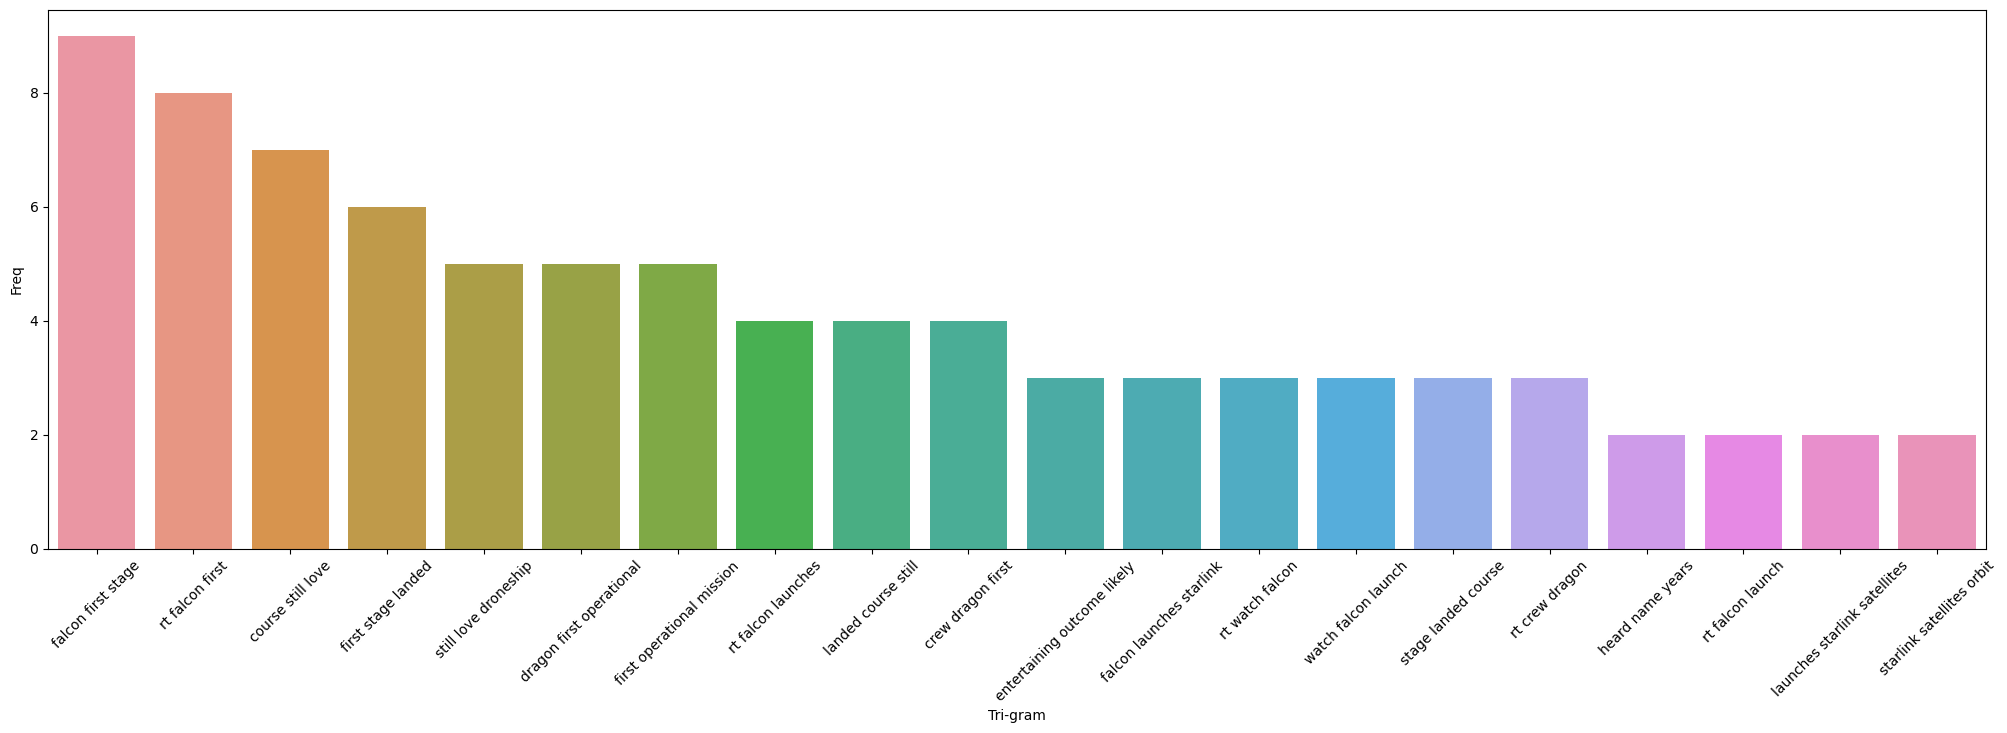

In [32]:
#Tri-gram plot
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [33]:
string_total = " ".join(data["Tidy_Tweets"])
string_total[:2000]

'alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse  getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account  true power haha crypto wallet give private keys avoided costs app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g meant price countries difference taxes amp shipping intended earth may ideas apply mars  xprize team manage carbon captu

In [34]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [35]:
fetch_sentiment_using_textblob = data.Tidy_Tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,Tidy_Tweets
positive,1795
negative,200


In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MASHOODH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.Tidy_Tweets[3])

{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

In [38]:
df_score=pd.DataFrame()
df_score['Tidy_Tweets'] = data.Tidy_Tweets
df_score['scores'] = data['Tidy_Tweets'].apply(lambda review: sid.polarity_scores(review))
df_score['compound']  = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df_score.head(10)

,Tidy_Tweets,scores,compound,sentiment
0,alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
3,doge underestimated,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp...",-0.2732,Negative
4,congratulations tesla china amazing execution ...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271,Positive
5,happy new year ox,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.5719,Positive
6,frodo underdoge thought would fail,"{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'comp...",-0.5423,Negative
7,haha thanks,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.7096,Positive
8,indeed tweets definitely represent realworld t...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.4019,Positive
9,entertaining outcome likely,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='sentiment', ylabel='count'>

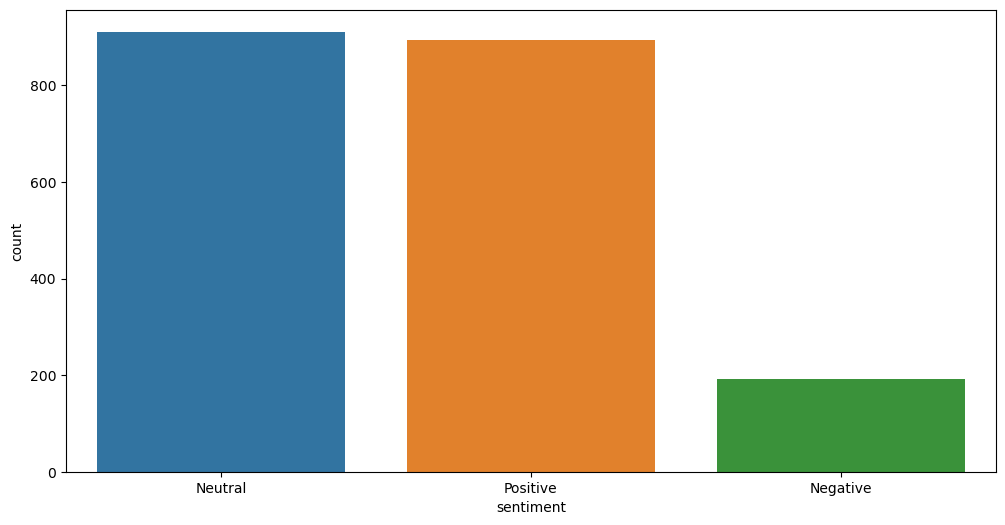

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)

In [40]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [41]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df_score['Tidy_Tweets'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df_score['sentiment'], test_size=0.25, random_state=7)

In [42]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score*100)

Accuracuy Score:  75.35070140280561


### extracting the review data from an e-commerce website amazon 

In [43]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

In [44]:
url = "https://www.amazon.in/LOreal-Professional-Absolute-Lipidium-Shampoo/product-reviews/B0744GC2CK"

In [45]:
response = requests.get(url)

In [46]:
# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

In [47]:
# Find the HTML elements containing the reviews or feedback
reviews = soup.find_all('div', class_='review')

In [48]:
# Extract the text from the reviews
review_texts = [review.get_text() for review in reviews]

In [49]:
# Perform emotion mining on the extracted reviews
sentiments = []
for review_text in review_texts:
    analysis = TextBlob(review_text)
    sentiment = 'positive' if analysis.sentiment.polarity >= 0 else 'negative'
    sentiments.append(sentiment)

In [50]:
# Count the number of positive and negative sentiments
sentiment_counts = {'positive': sentiments.count('positive'), 'negative': sentiments.count('negative')}

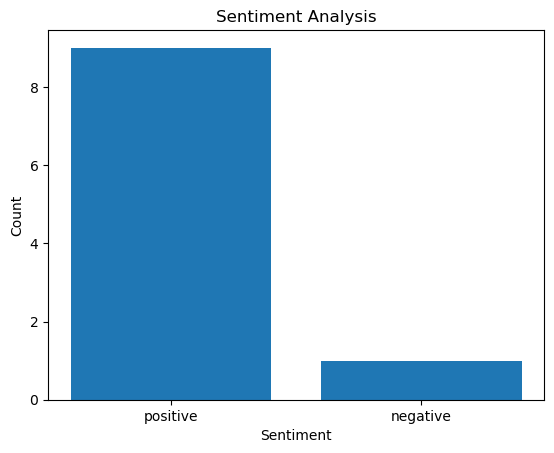

In [51]:
# Plot the sentiments
plt.bar(sentiment_counts.keys(), sentiment_counts.values())
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()